#Goodness of Fit Assignment - Citibike Data

Author: dp1618

In [2]:
import os
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


test if the distribution of ages can be modelled by a Gaussian

1) all riders

2) summer riders vs winder riders


In [3]:
dfjan = pd.read_csv('2014-01 - Citi Bike trip data.csv')
dffeb = pd.read_csv('2014-02 - Citi Bike trip data.csv')
dfmar = pd.read_csv('2014-03 - Citi Bike trip data.csv')
dfapr = pd.read_csv('2014-04 - Citi Bike trip data.csv')
dfmay = pd.read_csv('2014-05 - Citi Bike trip data.csv')
dfjun = pd.read_csv('2014-06 - Citi Bike trip data.csv')
dfjul = pd.read_csv('2014-07 - Citi Bike trip data.csv')
dfaug = pd.read_csv('2014-08 - Citi Bike trip data.csv')
dfsep = pd.read_csv('201409-citibike-tripdata.csv')
dfoct = pd.read_csv('201410-citibike-tripdata.csv')
dfnov = pd.read_csv('201411-citibike-tripdata.csv')
dfdec = pd.read_csv('201412-citibike-tripdata.csv')

In [4]:
#create 2 data frames which concatenate the winter/fall and spring/summer files
frames = [dfjan, dffeb, dfsep, dfoct, dfnov, dfdec]
dffw = pd.concat(frames)


frames = [dfmar, dfapr, dfmay, dfjun, dfjul, dfaug]
dfss = pd.concat(frames)


In [5]:
#remove the customers from the list (customers don't have birth years)
dffw_sub = dffw[dffw['usertype'] == 'Subscriber'].copy()
dfss_sub = dfss[dfss['usertype'] == 'Subscriber'].copy()

In [6]:
#replace birth years of '\\N' with NaN which can be handled by the float type
dfss_sub['birth year'].replace({'\\N': np.nan}, inplace=True)
dffw_sub['birth year'].replace({'\\N': np.nan}, inplace=True)

In [7]:
#convert the birth year column to a float type (from object)
dfss_sub['birth year'] = dfss_sub['birth year'].convert_objects(convert_numeric = True)
dffw_sub['birth year'] = dffw_sub['birth year'].convert_objects(convert_numeric = True)

In [8]:
#Get the age
dfss_sub['age'] = 2015-dfss_sub['birth year']
dffw_sub['age'] = 2015-dffw_sub['birth year']

In [9]:
#see what ages are in each dataframe
print pd.unique(dfss_sub['age'])
print pd.unique(dffw_sub['age'])

[  73.   55.   31.   30.   38.   32.   33.   40.   21.   28.   67.   29.
   35.   51.   26.   24.   23.   50.   27.   41.   25.   57.   42.   39.
   37.   44.   45.   34.   58.   36.   46.   61.   43.   52.   48.   49.
   65.   59.   19.   22.   47.   20.   54.   70.   68.   63.   60.   77.
   56.   64.   53.   18.   62.   66.   69.   71.   79.   74.   75.   93.
   72.  115.   76.   81.   78.  105.   80.   83.   88.  114.  116.   86.
   94.   98.   82.   91.   89.  102.   17.   95.  108.   84.   nan   85.]
[  29.   52.   24.   26.   25.   28.   32.   43.   34.   47.   39.   35.
   42.   33.   44.   31.   48.   58.   45.   49.   59.   56.   50.   38.
   37.   40.   53.   55.   30.   46.   36.   27.   54.   62.   51.   41.
   57.  115.   21.   61.   18.   67.   66.   19.   64.   60.   20.   22.
   23.   63.   72.   77.   70.   65.   69.   71.   68.   75.  116.   74.
   73.   82.   98.   76.   81.   88.   80.   79.   83.   93.   86.  114.
  105.   78.   84.   95.   89.   94.  108.  102.  

In [10]:
#remove the nan values and print the unique entries to check they have been removed
dfss_nonan = dfss_sub[np.isnan(dfss_sub['age']) == False]
print pd.unique(dfss_nonan['age'])
#remove the nan values and print the unique entries to check they have been removed
dffw_nonan = dffw_sub[np.isnan(dffw_sub['age']) == False]
print pd.unique(dffw_nonan['age'])

[  73.   55.   31.   30.   38.   32.   33.   40.   21.   28.   67.   29.
   35.   51.   26.   24.   23.   50.   27.   41.   25.   57.   42.   39.
   37.   44.   45.   34.   58.   36.   46.   61.   43.   52.   48.   49.
   65.   59.   19.   22.   47.   20.   54.   70.   68.   63.   60.   77.
   56.   64.   53.   18.   62.   66.   69.   71.   79.   74.   75.   93.
   72.  115.   76.   81.   78.  105.   80.   83.   88.  114.  116.   86.
   94.   98.   82.   91.   89.  102.   17.   95.  108.   84.   85.]
[  29.   52.   24.   26.   25.   28.   32.   43.   34.   47.   39.   35.
   42.   33.   44.   31.   48.   58.   45.   49.   59.   56.   50.   38.
   37.   40.   53.   55.   30.   46.   36.   27.   54.   62.   51.   41.
   57.  115.   21.   61.   18.   67.   66.   19.   64.   60.   20.   22.
   23.   63.   72.   77.   70.   65.   69.   71.   68.   75.  116.   74.
   73.   82.   98.   76.   81.   88.   80.   79.   83.   93.   86.  114.
  105.   78.   84.   95.   89.   94.  108.  102.   17.  

#Histograms of the Fall/Winter and Spring/Summer Ridership by Age

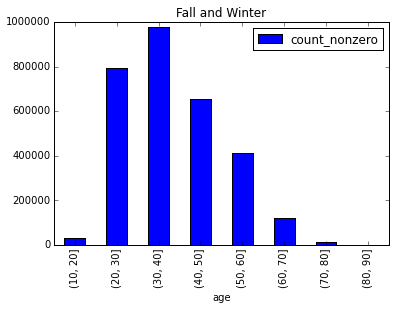

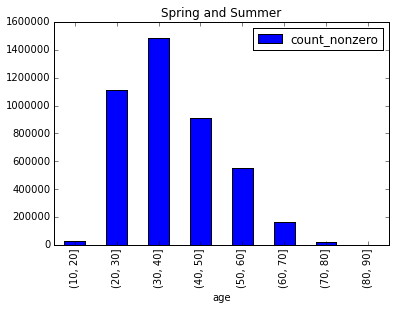

In [11]:
bins = np.arange(10, 99, 10)
dffw_nonan.age.groupby(pd.cut(dffw_nonan.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Fall and Winter")
dfss_nonan.age.groupby(pd.cut(dfss_nonan.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Spring and Summer")
#Create age distributions based on the bins
FW_age_dist = dffw_nonan.age.groupby(pd.cut(dffw_nonan.age, bins)).agg([count_nonzero])
SS_age_dist = dfss_nonan.age.groupby(pd.cut(dfss_nonan.age, bins)).agg([count_nonzero])

#KS Test for Goodness of Fit

In [16]:
#compare to normal

ksFW1=scipy.stats.kstest(dffw_nonan.age, 'norm')
ksSS1=scipy.stats.kstest(dfss_nonan.age, 'norm')
print "winter, normal fit", ksFW1
print "summer, normal fit", ksSS1

#compare to poisson 

ksFW2=scipy.stats.kstest(dffw_nonan.age, 'cauchy')
ksSS2=scipy.stats.kstest(dfss_nonan.age, 'cauchy')
print "winter, poisson fit", ksFW2
print "summer, poisson fit", ksSS2

 winter, normal fit (1.0, 0.0)
summer, normal fit (1.0, 0.0)
winter, poisson fit (0.98148385248112213, 0.0)
summer, poisson fit (0.98199746746354277, 0.0)


Because the p-value is less than our alpha, we can reject the null hypothesis.  Because the the KS statistic is close to 1 (large) we can also reject the null hypothesis. 

#Anderson Darling Test for Goodness of Fit

In [18]:
#compare to normal

aFW1=scipy.stats.anderson(dffw_nonan.age, 'norm')
aSS1=scipy.stats.anderson(dfss_nonan.age, 'norm')
print "winter, normal fit", aFW1[0]
print "summer, normal fit", aSS1[0]

#compare to exponential

aFW2=scipy.stats.anderson(dffw_nonan.age, 'expon')
aSS2=scipy.stats.anderson(dfss_nonan.age, 'expon')
print "winter, poisson fit", aFW2[0]
print "summer, poisson fit", aSS2[0]

winter, normal fit 38095.030566
summer, normal fit 64032.6436819
winter, poisson fit 705540.781269
summer, poisson fit 1031634.87744


Because the statistic for each of these distributions are large, we can reject the null hypothesis.  